### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#  Import and read the charity_data.csv.
application_df = pd.read_csv("C:/Users/Moxie/Documents/UoT - Boot camp/19 Advanced Machine Learning/Neural_Network_Charity_Analysis/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
attrition_cat = application_df.dtypes.index.tolist()
application_df[attrition_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

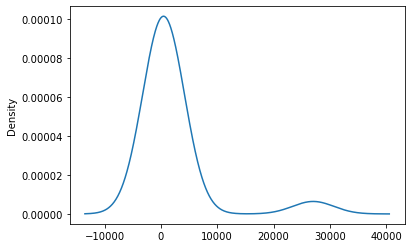

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

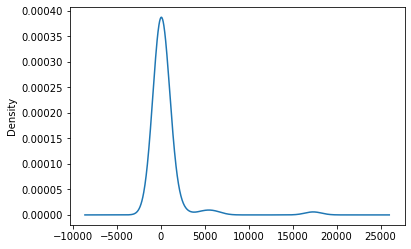

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Moxie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Moxie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 919us/step - loss: 0.6121 - accuracy: 0.6759
Epoch 2/100
804/804 [==============================] - 1s 919us/step - loss: 0.5643 - accuracy: 0.7249
Epoch 3/100
804/804 [==============================] - 1s 910us/step - loss: 0.5588 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 1s 918us/step - loss: 0.5559 - accuracy: 0.7306
Epoch 5/100
751/804 [===========================>..] - ETA: 0s - loss: 0.5540 - accuracy: 0.7317
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 962us/step - loss: 0.5548 - accuracy: 0.7311
Epoch 6/100
804/804 [==============================] - 1s 972us/step - loss: 0.5535 - accuracy: 0.7312
Epoch 7/100
804/804 [==============================] - 1s 922us/step - loss: 0.5524 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 922us/step - loss: 0.5517 - accuracy: 0.7340
Epoch 9/100
804/804 [=================

804/804 [==============================] - 1s 910us/step - loss: 0.5451 - accuracy: 0.7359
Epoch 64/100
804/804 [==============================] - 1s 919us/step - loss: 0.5452 - accuracy: 0.7362
Epoch 65/100
501/804 [=================>............] - ETA: 0s - loss: 0.5474 - accuracy: 0.7351
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5452 - accuracy: 0.7353
Epoch 66/100
804/804 [==============================] - 1s 919us/step - loss: 0.5448 - accuracy: 0.7355
Epoch 67/100
804/804 [==============================] - 1s 913us/step - loss: 0.5450 - accuracy: 0.7355
Epoch 68/100
804/804 [==============================] - 1s 904us/step - loss: 0.5452 - accuracy: 0.7363
Epoch 69/100
804/804 [==============================] - 1s 902us/step - loss: 0.5449 - accuracy: 0.7364
Epoch 70/100
498/804 [=================>............] - ETA: 0s - loss: 0.5435 - accuracy: 0.7383
Epoch 70: saving model to checkpoints\weights.70

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5517 - accuracy: 0.7268 - 282ms/epoch - 1ms/step
Loss: 0.5516979694366455, Accuracy: 0.7267638444900513


In [23]:
# Export our model to HDF5 file
nn.save("trained_attrition.h5")

<AxesSubplot:>

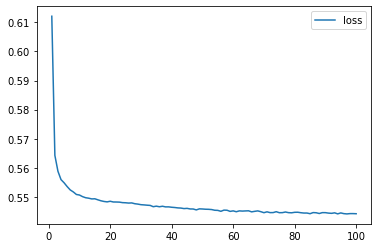

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

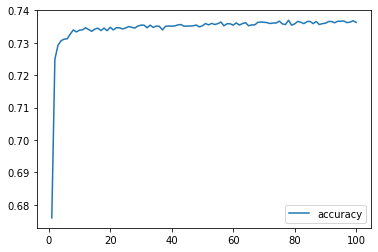

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Deliverable 3: Optimize the Model

#### Optimization Attempt 1 - increase # of nodes in the hidden layers

In [26]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 9

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                1320      
                                                                 
 dense_4 (Dense)             (None, 9)                 279       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,609
Trainable params: 1,609
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [28]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [29]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 952us/step - loss: 0.5844 - accuracy: 0.7107
Epoch 2/100
804/804 [==============================] - 1s 955us/step - loss: 0.5594 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 1s 941us/step - loss: 0.5549 - accuracy: 0.7320
Epoch 4/100
804/804 [==============================] - 1s 962us/step - loss: 0.5519 - accuracy: 0.7322
Epoch 5/100
783/804 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7319
Epoch 5: saving model to checkpoints2\weights.05.hdf5
804/804 [==============================] - 1s 976us/step - loss: 0.5505 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 1s 950us/step - loss: 0.5498 - accuracy: 0.7329
Epoch 7/100
804/804 [==============================] - 1s 952us/step - loss: 0.5487 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 1s 953us/step - loss: 0.5483 - accuracy: 0.7332
Epoch 9/100
804/804 [================

804/804 [==============================] - 1s 973us/step - loss: 0.5399 - accuracy: 0.7385
Epoch 64/100
804/804 [==============================] - 1s 965us/step - loss: 0.5400 - accuracy: 0.7383
Epoch 65/100
529/804 [==================>...........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7408
Epoch 65: saving model to checkpoints2\weights.65.hdf5
804/804 [==============================] - 1s 970us/step - loss: 0.5396 - accuracy: 0.7387
Epoch 66/100
804/804 [==============================] - 1s 955us/step - loss: 0.5394 - accuracy: 0.7383
Epoch 67/100
804/804 [==============================] - 1s 942us/step - loss: 0.5398 - accuracy: 0.7391
Epoch 68/100
804/804 [==============================] - 1s 945us/step - loss: 0.5398 - accuracy: 0.7384
Epoch 69/100
804/804 [==============================] - 1s 948us/step - loss: 0.5394 - accuracy: 0.7388
Epoch 70/100
480/804 [================>.............] - ETA: 0s - loss: 0.5393 - accuracy: 0.7372
Epoch 70: saving model to checkpoints2\weights.

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5561 - accuracy: 0.7231 - 251ms/epoch - 937us/step
Loss: 0.5561487078666687, Accuracy: 0.7231487035751343


In [32]:
# Export our model to HDF5 file
nn2.save("trained_attrition.h5")

<AxesSubplot:>

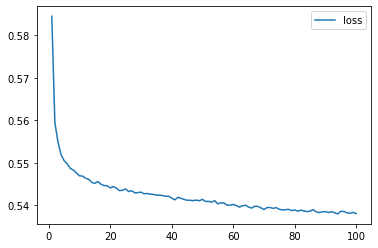

In [33]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_model2.history, index=range(1,len(fit_model2.history["loss"])+1))

# Plot the loss
history_df2.plot(y="loss")

<AxesSubplot:>

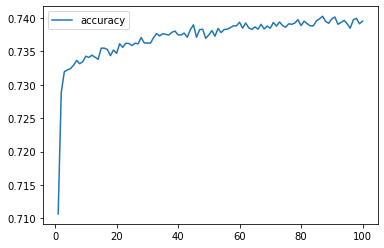

In [34]:
# Plot the accuracy
history_df2.plot(y="accuracy")

#### Optimization Attempt 2 - increase the number of hidden layers

In [51]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 2

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 40)                1760      
                                                                 
 dense_15 (Dense)            (None, 10)                410       
                                                                 
 dense_16 (Dense)            (None, 2)                 22        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 2,195
Trainable params: 2,195
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

In [53]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [54]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
fit_model3 = nn3.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6104 - accuracy: 0.7109
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5726 - accuracy: 0.7269
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5638 - accuracy: 0.7271
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5594 - accuracy: 0.7290
Epoch 5/100
768/804 [===========================>..] - ETA: 0s - loss: 0.5589 - accuracy: 0.7291
Epoch 5: saving model to checkpoints3\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5588 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7331
Epoch 9/100
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7385
Epoch 65/100
531/804 [==================>...........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7366
Epoch 65: saving model to checkpoints3\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5418 - accuracy: 0.7388
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7378
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7380
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7387
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5415 - accuracy: 0.7393
Epoch 70/100
497/804 [=================>............] - ETA: 0s - loss: 0.5449 - accuracy: 0.7359
Epoch 70: saving model to checkpoints3\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5411 - accuracy: 0.7393
Epoch 71/100
804/80

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5530 - accuracy: 0.7256 - 288ms/epoch - 1ms/step
Loss: 0.552960991859436, Accuracy: 0.7255976796150208


In [57]:
# Export our model to HDF5 file
nn3.save("trained_attrition.h5")

<AxesSubplot:>

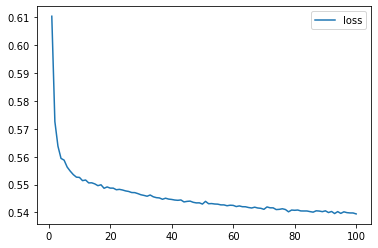

In [58]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_model3.history, index=range(1,len(fit_model3.history["loss"])+1))

# Plot the loss
history_df3.plot(y="loss")

<AxesSubplot:>

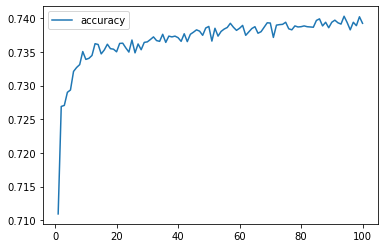

In [59]:
# Plot the accuracy
history_df3.plot(y="accuracy")

#### Optimization Attempt 3 - adjusting activation/optimizers

In [171]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 5

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softplus")
)

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softplus"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                1320      
                                                                 
 dense_37 (Dense)            (None, 5)                 155       
                                                                 
 dense_38 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________


In [172]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

In [173]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [174]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])

In [175]:
# Train the model
fit_model4 = nn4.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 902us/step - loss: 0.6354 - accuracy: 0.6647
Epoch 2/50
804/804 [==============================] - 1s 897us/step - loss: 0.5757 - accuracy: 0.7234
Epoch 3/50
804/804 [==============================] - 1s 888us/step - loss: 0.5676 - accuracy: 0.7256
Epoch 4/50
804/804 [==============================] - 1s 886us/step - loss: 0.5639 - accuracy: 0.7256
Epoch 5/50
740/804 [==========================>...] - ETA: 0s - loss: 0.5618 - accuracy: 0.7266
Epoch 5: saving model to checkpoints4\weights.05.hdf5
804/804 [==============================] - 1s 911us/step - loss: 0.5616 - accuracy: 0.7271
Epoch 6/50
804/804 [==============================] - 1s 897us/step - loss: 0.5600 - accuracy: 0.7276
Epoch 7/50
804/804 [==============================] - 1s 896us/step - loss: 0.5586 - accuracy: 0.7280
Epoch 8/50
804/804 [==============================] - 1s 886us/step - loss: 0.5577 - accuracy: 0.7285
Epoch 9/50
804/804 [=========================

In [176]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5538 - accuracy: 0.7250 - 268ms/epoch - 1ms/step
Loss: 0.5538355112075806, Accuracy: 0.7250145673751831


In [177]:
# Export our model to HDF5 file
nn4.save("trained_attrition.h5")

<AxesSubplot:>

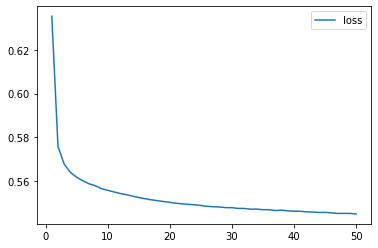

In [178]:
# Create a DataFrame containing training history
history_df4 = pd.DataFrame(fit_model4.history, index=range(1,len(fit_model4.history["loss"])+1))

# Plot the loss
history_df4.plot(y="loss")

<AxesSubplot:>

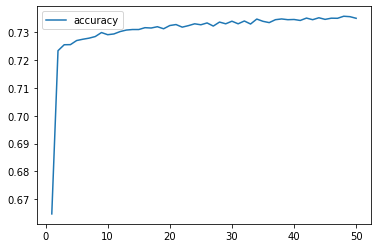

In [179]:
# Plot the accuracy
history_df4.plot(y="accuracy")